<a href="https://colab.research.google.com/github/LeeTae-hyun/GIS_Python/blob/master/Lab05_Vector_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this lab, we will learn how to set up a coordinate system for a map using Python, and how to create a choropleth map.
# Please answer all the questions at the end of this exercise.
## Learning objectives
- Feature of Vector Data
- Datum and Projection setting
- Table join and Modify
- Creating a Choropleth map

# Install Package
### 이번 실습에서 사용할 패키지로, 실습 이전 미리 설치 후 진행 바랍니다.
- **Mapclassify**: 단계 구분도를 만들때나 데이터를 분류해야할 때 특정 기준에 따라 데이터를 분류하는 데 사용되는 패키지입니다. 
- **pandas**: 데이터를 수정하고, 분석을 하기 위한 패키지로, 표(엑셀) 형식의 데이터를 다루기에 효과적입니다.
- **geopandas**: 공간 데이터(Shape 파일 등)를 다루기 위한 라이브러리로, pandas의 엑셀형 데이터 구조를 확장하여 공간 데이터를 처리하는 데 사용됩니다. 
- **matplotlib**: 데이터 시각화 패키지로, 그래프나 지도를 생성하는 데 사용됩니다. 
- **pathlib**: 파일 및 디렉토리 경로를 다루는 데 사용되는 패키지입니다. 파일 경로를 다루는데 유용하게 사용됩니다.
- **pyproj**: 좌표 변환을 위한 라이브러리로, 지리적 좌표계 간의 변환을 수행할 수 있습니다. 지도 프로젝션, 좌표계 변환 및 좌표 데이터 처리에 사용됩니다. 

In [4]:
! pip install --upgrade mapclassify
! pip install pandas
! pip install geopandas
! pip install matplotlib
! pip install matplotlib_scalebar
! pip install pathlib
! pip install pyproj

# Import package
### 위에서 설치한 패키지를 적용합니다.
- data_folder = Path(".../GIS_Seoul_shp")부분에는 본인이 저장한 실습파일의 경로를 작성해야 합니다.
- gdf = gpd.read_file(fp) 코드를 통해 Shp 파일을 불러온 후 본격적인 실습을 시작합니다.

In [5]:
import pandas as pd
import geopandas as gpd
import pyproj
import matplotlib.pyplot as plt
from pathlib import Path
data_folder = Path("/Users/leet/Leet_Study/GISLab04/GIS_Seoul_Shp/")
fp = data_folder / "Seoul.shp"
gdf = gpd.read_file(fp)

# Feature of Vector Data
## 본 실습에서 다루게 될 벡터 데이터의 특징을 생각하며 실습을 진행해주세요
### Vector data is one way of representing geographic information by expressing geographic space in terms of geometric objects such as points, lines, and polygons.
- **Positional accuracy**: Vector data can accurately represent geographic location using coordinates. These coordinates play an important role in determining the accuracy of spatial data.
- **Shape of objects**: Vector data is represented as geometric objects such as points, lines, and polygons. These objects are useful for visualizing and analyzing geographic information.
- **Attribute information**: Vector data contains attribute information about the objects. For example, if the components of geographic space are buildings, the attribute information can include the name, address, size, and other information about the buildings.
- **Data size**: The size of vector data depends on the spatial resolution and the number of objects. The larger the number of objects or the higher the resolution, the larger the data size.
- **Ease of analysis**: Vector data contains both positional and attribute information about objects, making it very useful for analyzing geographic information. For example, analysis tasks such as finding the largest building in a geographic space can be performed.

- 아래의 코드를 이용해 shape 파일의 정보를 확인해보면 5x4(5행 4열)의 데이터 구조를 갖고 있는 것을 알 수 있으며,\
파일을 시각화하면 이것이 서울의 shape 파일인것을 알 수 있다.

In [6]:
gdf.head() #()안에 숫자를 넣으면 나타나는 행의 갯수가 달라짐 

,BASE_DATE,SIGUNGU_CD,SIGUNGU_NM,geometry
0,20220630,11010,종로구,"POLYGON ((953683.828 1959209.871, 953665.283 1..."
1,20220630,11020,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,20220630,11030,용산구,"POLYGON ((953114.222 1950746.999, 953114.218 1..."
3,20220630,11040,성동구,"POLYGON ((959381.838 1952723.894, 959416.042 1..."
4,20220630,11050,광진구,"POLYGON ((964825.058 1952633.250, 964875.581 1..."


<Axes: >

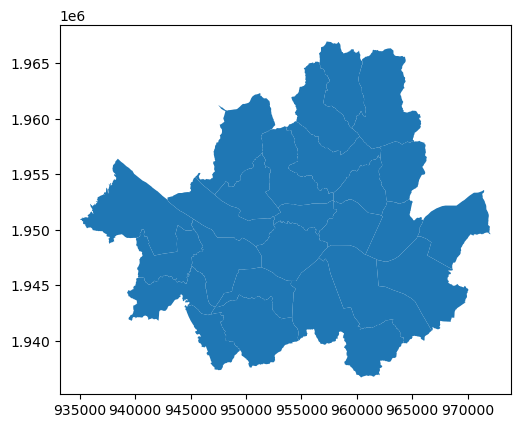

In [7]:
gdf.plot()

- 아래의 코드를 이용해, shape파일의 좌표계를 확인해보자

In [8]:
print(type(gdf.crs))

<class 'NoneType'>


### Datum and Projection
- Shape 파일의 좌표계를 확인한 결과, 좌표계가 없기 때문에 좌표계를 설정해주어야한다.
- There are many different coordinate systems used in Korea, but in this lab we will create a map using the GRS80 ellipsoid as a reference.
- EPSG is a unique name for a global coordinate system, and the coordinate system we will use, EPSG5179, is a projection of the GRS80 ellipsoid in UTM-k.
- 아래의 코드를 이용해 Datum과 Projection을 설정해주자

In [9]:
# Datum과 Projection을 위한 EPSG 코드 정의 (예: EPSG 5179)
epsg_code = 'EPSG:5179'

# UTM 프로젝션과 EPSG 5179 좌표계 정의
utm_proj = pyproj.CRS.from_string(epsg_code)

# GeoDataFrame(Shp파일)에 좌표계가 없기 때문에 임의로 설정 해주어야 함
gdf.crs = utm_proj

# GeoDataFrame의 좌표계 변경
gdf = gdf.to_crs(utm_proj)

# 변경된 데이터를 새로운 shape 파일로 저장
gdf.to_file('Seoulpro.shp')

In [10]:
# 설정된 좌표계 확인
gdf.crs

<Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### 지도의 용도에 따라 적절한 좌표계와 투영법을 사용하지 않으면, 지도에 왜곡이 생기기 때문에 적절한 좌표계와 투영법을 잘 설정해야한다.
- GRS80 타원체를 기준으로 UTM 투영법을 적용한 Korea 2000 / Unified CS 좌표계를 사용한 지도와\
WGS84 타원체를 기준으로 투영법을 적용하지 않은 WGS84 좌표계를 사용한 지도를 비교해보자

In [11]:
#새로운 Shp파일을 임시로 생성하기 위해 기존의 Shp 파일을 복사
data_WGS84 = gdf.copy()

In [12]:
#새로 만든 임시 Shp파일의 좌표계 변경
data_WGS84 = gdf.to_crs(epsg=4326)

In [13]:
#좌표계의 정보를 확인해보면, 투영법이 적용되지 않았다는 것을 알 수 있다.
data_WGS84.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### 투영법 유무의 차이점을 파악하기 위한 시각화
- **투영법이 있는 지도와 없는 지도를 만들어보고 차이점이 무엇이 있는지 확인하세요**

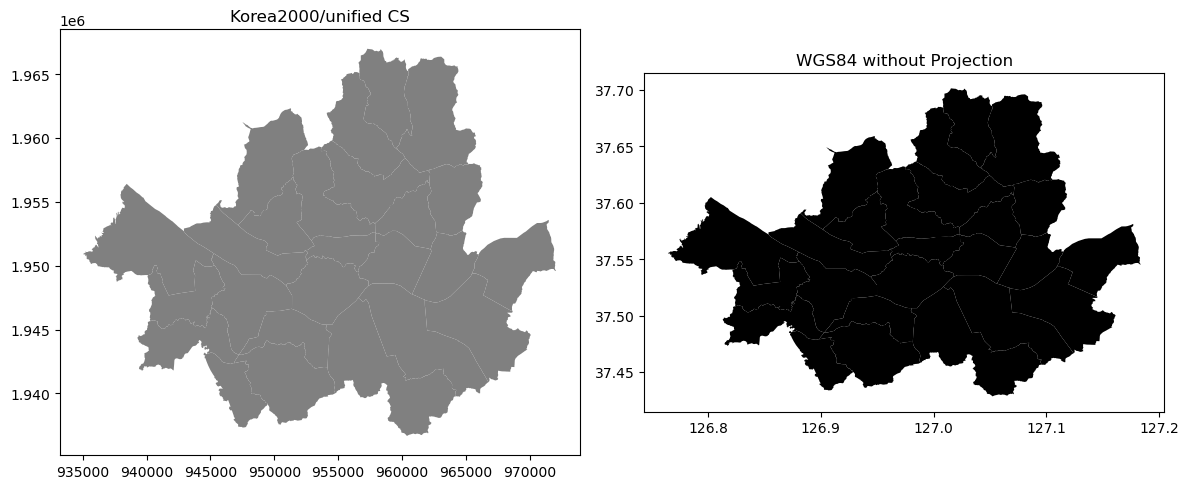

In [24]:
#CRS 차이점 시각화
#Make subplots that are next to each others
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,12))

#Plot the data in crs
gdf.plot(ax=ax1, facecolor = "gray")

#Add title
ax1.set_title("Korea2000/unified CS")

#Plot the one with epsg4326
data_WGS84.plot(ax=ax2, facecolor = "black")

#Add title
ax2.set_title("WGS84 without Projection")

#Set aspect ratio as 1
ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)

#Remove empty white space around the plot
plt.tight_layout()

### Mapping
- 올바른 투영법이 적용된 Shape 파일을 이용해 간단한 지도를 제작해 봅시다.

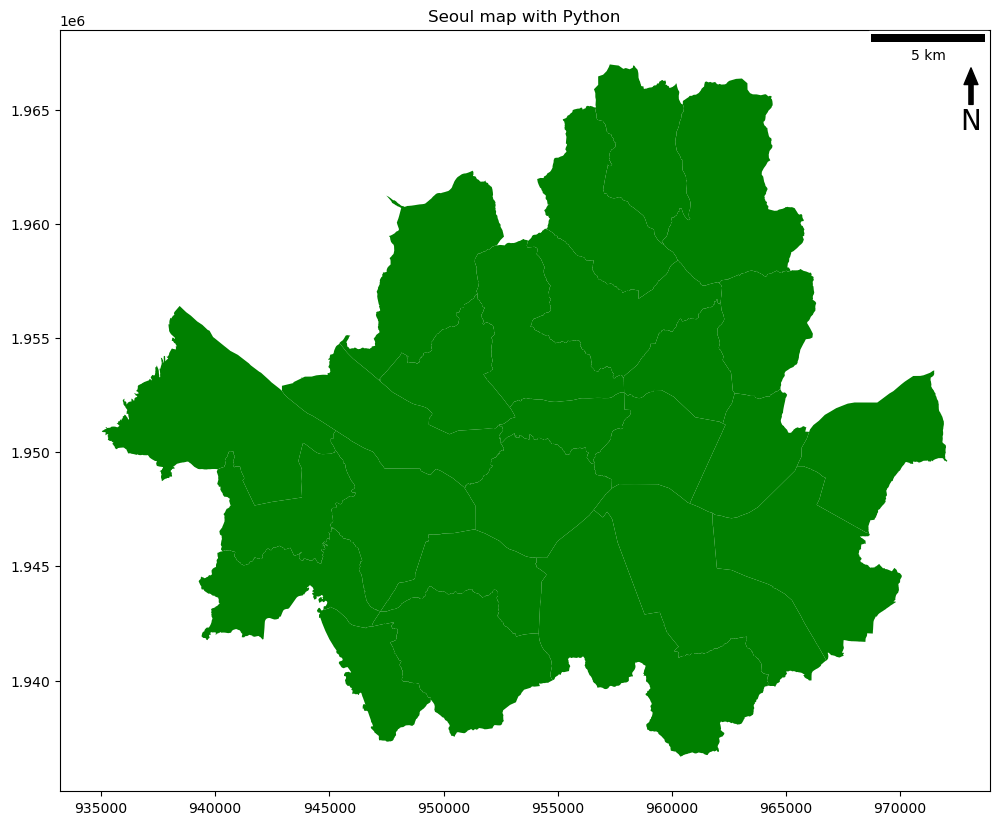

In [15]:
#Add Background Layout
fig, ax = plt.subplots(figsize=(12,12))

gdf.plot(ax=ax, facecolor="green")

#Add title
ax.set_title("Seoul map with Python")

#Add north Arrow
x, y, arrow_length = 0.98, 0.95, 0.07
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=3, headwidth=10),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

#Add scale bar
from matplotlib_scalebar.scalebar import ScaleBar

ax.add_artist(ScaleBar(1))

### 서울시 인구밀도 단계구분도 제작
- 서울시 구별 인구 통계자료를 활용해야하므로, 자료를 확인한다.

In [33]:
# 인구 통계 불러오기
pop = pd.read_csv('/Users/leet/Leet_Study/GISLab04/2023_08_서울시인구.csv', encoding="Euc-KR")
pop.head()

,행정구역(시군구)별,2023.08
0,행정구역(시군구)별,총인구수 (명)
1,서울특별시,9409466
2,종로구,140032
3,중구,121482
4,용산구,216547


- 현재 자료를 보면, Column의 이름이 적절치 않고, 25개구 이외 필요없는 데이터가 존재하므로 이를 수정해야한다.

In [34]:
#Columns 이름 변경
pop_re = pop.rename(columns = {'행정구역(시군구)별':'자치구', '2023.08' : '인구수'} ) 
#파일을 새로 만들지 않고, 불러온 csv 파일 자체를 수정하는 방법도 있으나, 원본 자료를 보존하는 것이 추천된다.
pop_re.head()

,자치구,인구수
0,행정구역(시군구)별,총인구수 (명)
1,서울특별시,9409466
2,종로구,140032
3,중구,121482
4,용산구,216547


In [35]:
#필요없는 행 삭제
index_to_delete = [0, 1]  #필요없는 데이터인 인덱스 0, 1의 행을 삭제
pop_re = pop_re.drop(index_to_delete)
pop_re.head()

,자치구,인구수
2,종로구,140032
3,중구,121482
4,용산구,216547
5,성동구,278750
6,광진구,336446


- 기본적인 csv 파일 수정을 마쳤기에 이제 Shape 파일에 Join 시킨다.

In [36]:
#데이터 Join
join_column = 'SIGUNGU_NM'
seoul_pop = gdf.merge(pop_re, left_on='SIGUNGU_NM', right_on='자치구', how='left') 
#pop_re = join할 table이름, left_on = shp 공통 컬럼, right_on = table 공통 컬럼, how = join 방식
#csv파일을 shp 파일에 Join 시키기 위해서는, shp파일과 csv 파일이 공유하는 공통 내용이 존재해야 한다.
seoul_pop.head()

,BASE_DATE,SIGUNGU_CD,SIGUNGU_NM,geometry,자치구,인구수
0,20220630,11010,종로구,"POLYGON ((953683.828 1959209.871, 953665.283 1...",종로구,140032
1,20220630,11020,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",중구,121482
2,20220630,11030,용산구,"POLYGON ((953114.222 1950746.999, 953114.218 1...",용산구,216547
3,20220630,11040,성동구,"POLYGON ((959381.838 1952723.894, 959416.042 1...",성동구,278750
4,20220630,11050,광진구,"POLYGON ((964825.058 1952633.250, 964875.581 1...",광진구,336446


In [37]:
#이때 자치구 column은 중복되는 내용이 들어있는 column이기에 삭제시킨다
data_delete = ['자치구']
seoul_pop = seoul_pop.drop(data_delete, axis = 1)
#axis = 1의 의미는 2차원 데이터(행렬)에서 행이 아닌 열 데이터를 삭제 시킨다는 의미이며,행 데이터를 삭제할 때는 axis = 0 으로 작성하거나 아무것도 작성하지 않으면 된다.
#axis에 대해 더 자세한 내용이 궁금하면 검색, 질문등의 방법을 통해 알아가는 것을 추천한다.
seoul_pop.head()

,BASE_DATE,SIGUNGU_CD,SIGUNGU_NM,geometry,인구수
0,20220630,11010,종로구,"POLYGON ((953683.828 1959209.871, 953665.283 1...",140032
1,20220630,11020,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",121482
2,20220630,11030,용산구,"POLYGON ((953114.222 1950746.999, 953114.218 1...",216547
3,20220630,11040,성동구,"POLYGON ((959381.838 1952723.894, 959416.042 1...",278750
4,20220630,11050,광진구,"POLYGON ((964825.058 1952633.250, 964875.581 1...",336446


- 인구밀도 정보는 없기 때문에 계산을 통해 직접 인구밀도 수치를 만들어야한다.
- 인구밀도를 계산하는 방법은 (인구수/면적)이기 때문에 우리는 Shape 파일의 geometry 정보를 이용해서 서울시의 구별 면적을 계산해줘야한다.
- 현재 shp 파일에 담겨있는 geometry 정보는 면적을 계산할 수 없는 상태이기 때문에, 이를 Lambda식을 이용해 변환 시켜줄 것이다.

In [38]:
# Geometry 열을 구별 면적을 계산할 수 있는 객체로 변환
seoul_pop['geometry'] = seoul_pop['geometry'].apply(lambda x: x if x.is_empty else x.buffer(0))

In [39]:
# 인구 데이터를 숫자로 변환
seoul_pop['인구수'] = seoul_pop['인구수'].astype(float)

In [40]:
# 인구밀도 계산 (인구 / 면적)
seoul_pop['인구밀도'] = seoul_pop['인구수'] / seoul_pop.geometry.area * 1000000  # 면적을 제곱킬로미터로 변환
seoul_pop.head()

,BASE_DATE,SIGUNGU_CD,SIGUNGU_NM,geometry,인구수,인구밀도
0,20220630,11010,종로구,"POLYGON ((953683.828 1959209.871, 953665.283 1...",140032.0,5841.308896
1,20220630,11020,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",121482.0,12169.279558
2,20220630,11030,용산구,"POLYGON ((953114.222 1950746.999, 953114.218 1...",216547.0,9898.701914
3,20220630,11040,성동구,"POLYGON ((959381.838 1952723.894, 959416.042 1...",278750.0,16587.940166
4,20220630,11050,광진구,"POLYGON ((964825.058 1952633.250, 964875.581 1...",336446.0,19749.199660


Text(0.98, 0.8500000000000001, 'N')

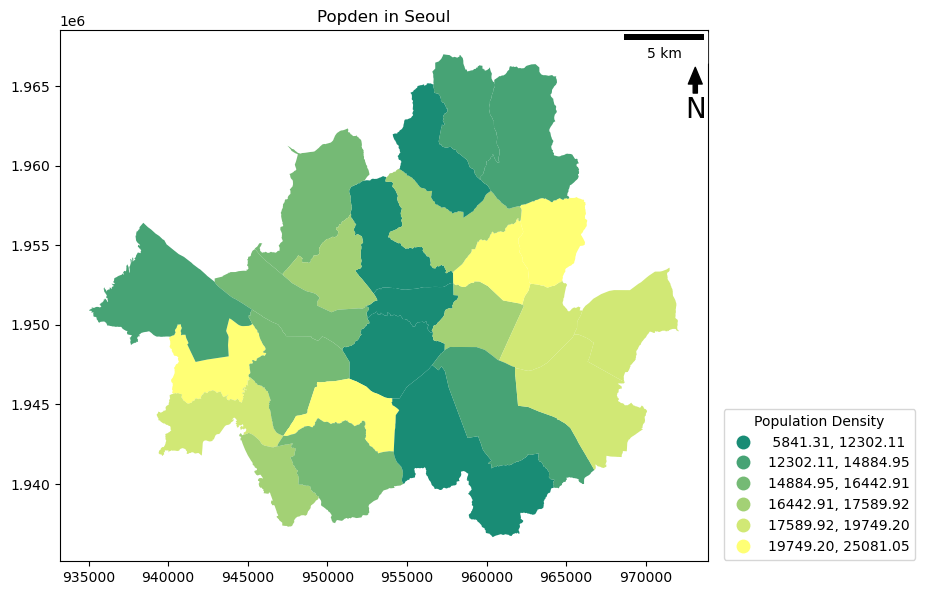

In [41]:
#지도 제작
fig, ax = plt.subplots(figsize = (10, 6))
seoul_pop.plot(ax = ax, 
              column = '인구밀도', # 단계구분도로 나타낼 table 선택
              linewidth = 0.03, 
              cmap = 'summer', # 지도 색상 선택
              scheme = 'quantiles', # Class 분류 방법 선택
              k = 6, # Class 개수 선택
              alpha = 0.9, # 지도 투명도
              legend = True)
ax.get_legend().set_bbox_to_anchor((1.33, 0.3))
ax.get_legend().set_title("Population Density")
ax.add_artist(ScaleBar(1))
plt.tight_layout()

#Add title
ax.set_title("Popden in Seoul")

#Add north Arrow
x, y, arrow_length = 0.98, 0.93, 0.08
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=3, headwidth=10),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)


#지도를 이미지로 저장하는 방법
#outfp = "Popden in Seoul.png"
#plt.savefig(outfp, dpi = 600)